<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')

In [6]:
roomba_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [7]:
mobile_robot_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [8]:
import missingno as ms

In [9]:
import datetime
from datetime import datetime


def get_Date_Formatted(date_list):
  datetime_obj_list=[]
  for x in date_list:
    datetimeObj = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    datetime_obj_list.append(datetimeObj)
  return datetime_obj_list


mobile_robot_data['timestamp']=get_Date_Formatted(mobile_robot_data['timestamp'])
roomba_data['timestamp']=get_Date_Formatted(roomba_data['timestamp'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


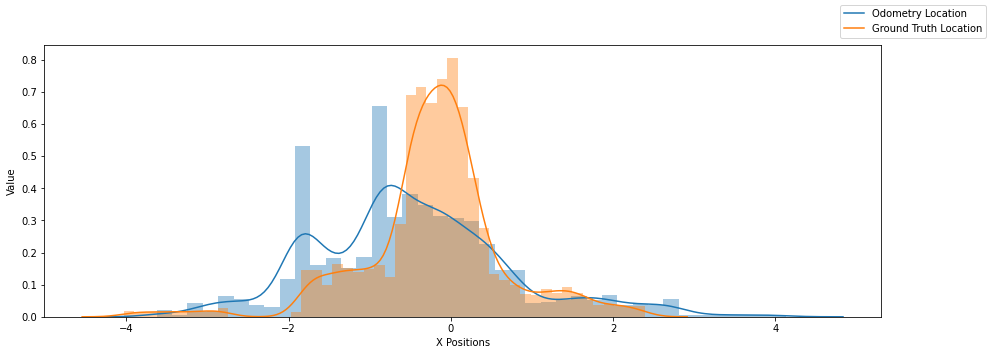

In [10]:
fig=plt.figure(figsize = (15,5))
sns.distplot(roomba_data['X_ODOM'])
sns.distplot(roomba_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


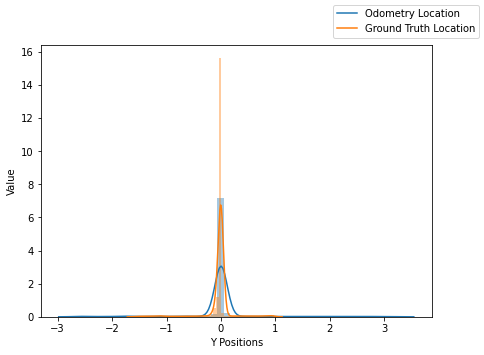

In [11]:
fig=plt.figure(figsize = (7,5))
sns.distplot(roomba_data['Y_ODOM'])
sns.distplot(roomba_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


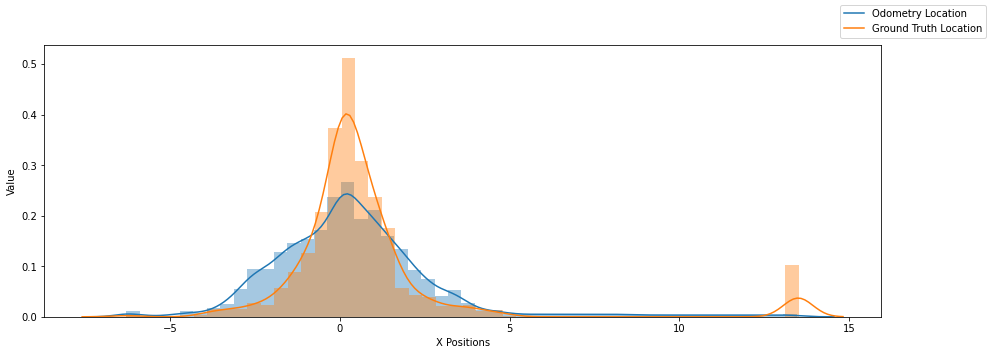

In [12]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['X_ODOM'])
sns.distplot(mobile_robot_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


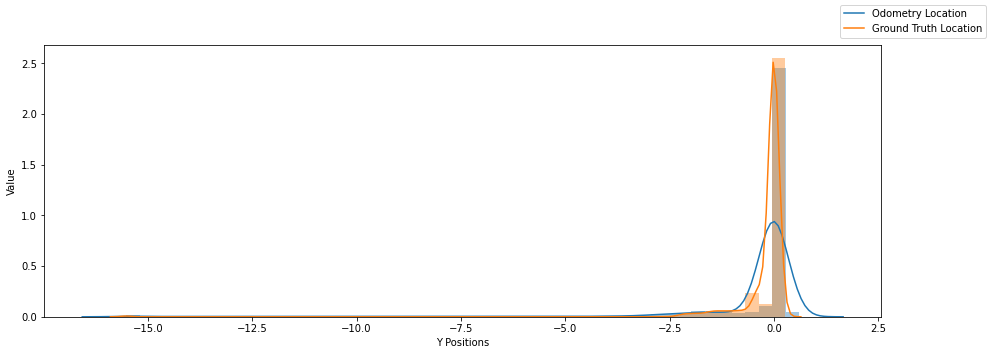

In [13]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['Y_ODOM'])
sns.distplot(mobile_robot_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


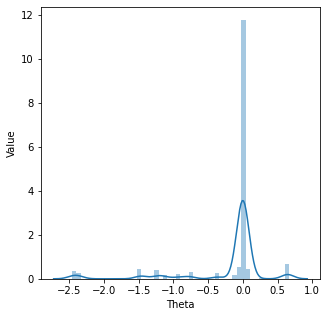

In [14]:

fig=plt.figure(figsize = (5,5))
sns.distplot(mobile_robot_data['Theta'])
plt.xlabel("Theta")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


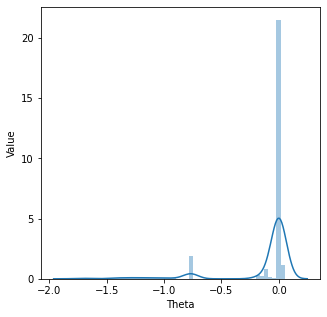

In [15]:
fig=plt.figure(figsize = (5,5))
sns.distplot(roomba_data['Theta'])
plt.xlabel("Theta")
plt.ylabel("Value")
plt.show()

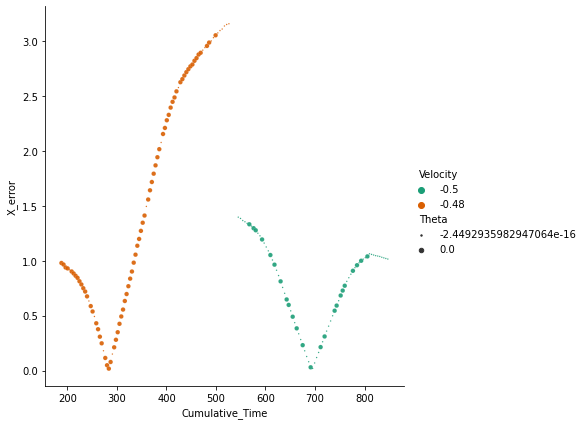

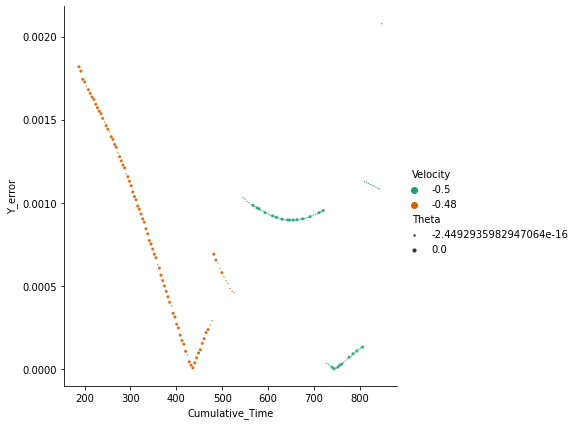

In [92]:
df=mobile_robot_data[mobile_robot_data['Surface_Type']=='TILE']
sns.color_palette("tab10")
data_df=df[df['Velocity']<-0.45]
# data_df=data_df[data_df['Velocity']<0.45]
# # data_df=data_df[data_df['Velocity']>0.2]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(2, 20),palette="Dark2",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(2, 10),palette="Dark2",
            height=6, data=data_df)



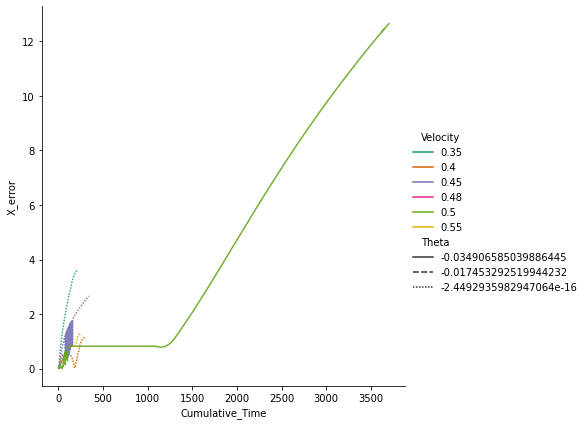

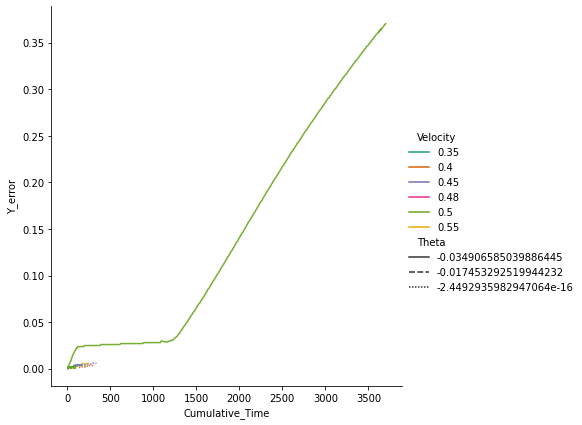

In [101]:
df=mobile_robot_data[mobile_robot_data['Surface_Type']=='CARPET']
sns.color_palette("tab10")
data_df=df[df['Velocity']>0.25]
data_df=data_df[data_df['Theta']!=0]
data_df=data_df[data_df['Velocity']>0.3]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", style="Theta",
             alpha=.9, sizes=(2, 5),palette="Dark2", kind="line",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", style="Theta",
             alpha=.9, sizes=(2, 5),palette="Dark2", kind="line",
            height=6, data=data_df)

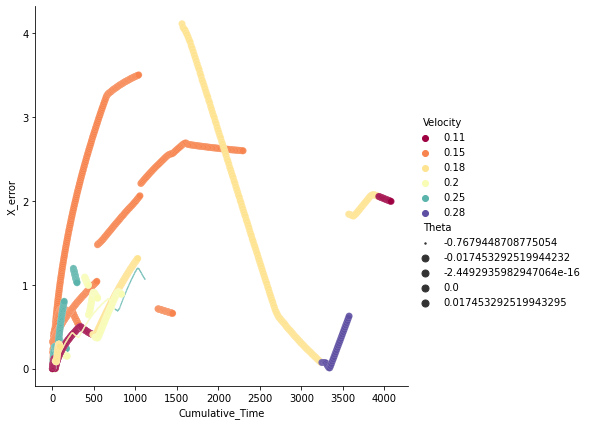

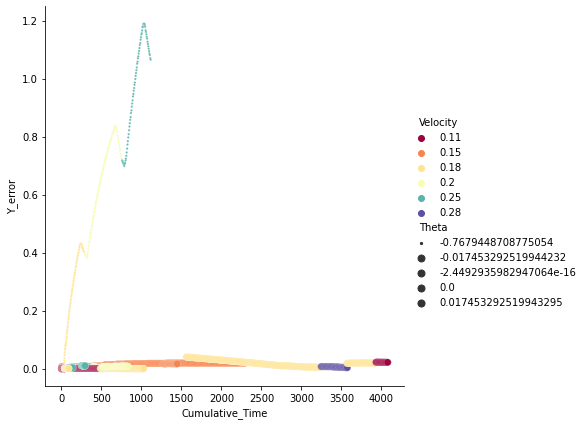

In [ ]:
df=mobile_robot_data[mobile_robot_data['Surface_Type']=='CARPET']
sns.color_palette("tab10")
data_df=df[df['Velocity']>0.1]
data_df=data_df[data_df['Velocity']<0.3]
# # data_df=data_df[data_df['Velocity']>0.2]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(2, 50),palette="Spectral",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(5, 50),palette="Spectral",
            height=6, data=data_df)

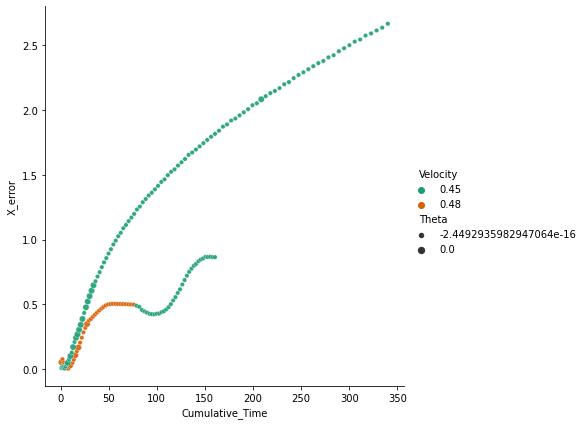

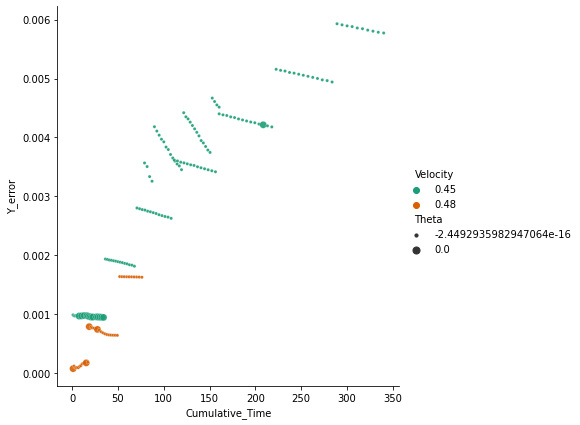

In [ ]:
df=mobile_robot_data[mobile_robot_data['Surface_Type']=='CARPET']
sns.color_palette("tab10")
data_df=df[df['Velocity']>0.4]
data_df=data_df[data_df['Velocity']<0.5]
# # data_df=data_df[data_df['Velocity']>0.2]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(20, 40),palette="Dark2",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(10, 50),palette="Dark2",
            height=6, data=data_df)

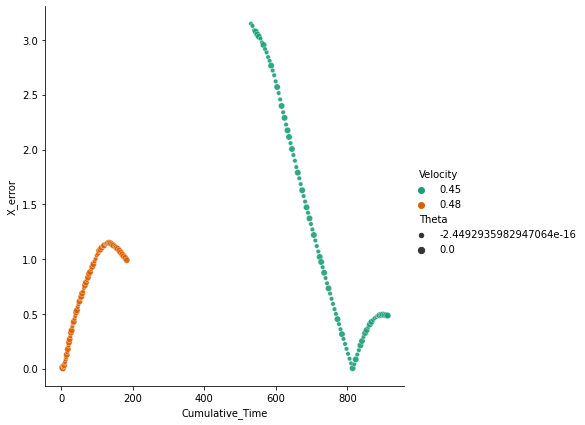

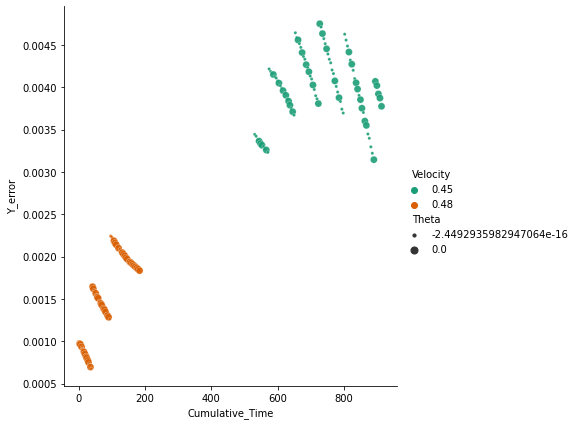

In [ ]:
df=mobile_robot_data[mobile_robot_data['Surface_Type']=='TILE']
sns.color_palette("tab10")
data_df=df[df['Velocity']>0.4]
data_df=data_df[data_df['Velocity']<0.5]
# # data_df=data_df[data_df['Velocity']>0.2]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(20, 40),palette="Dark2",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(10, 50),palette="Dark2",
            height=6, data=data_df)

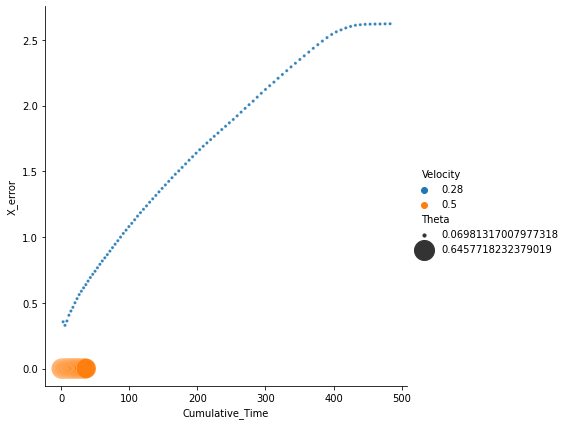

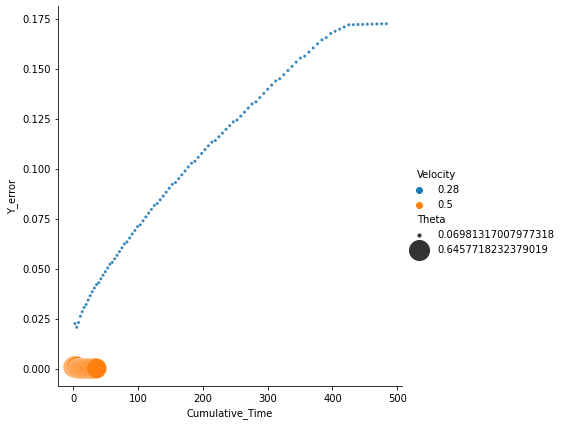

In [ ]:
df=mobile_robot_data[['Series_ID','X_error','Y_error','Cumulative_Time','Velocity','Theta','timestamp']]
sns.color_palette("tab10")
data_df=df[df['Theta']>0]
data_df=data_df[data_df['Velocity']>0.2]
sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(10, 400),palette="tab10",
            height=6, data=data_df)
sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
             alpha=.9, sizes=(10, 400),palette="tab10",
            height=6, data=data_df)

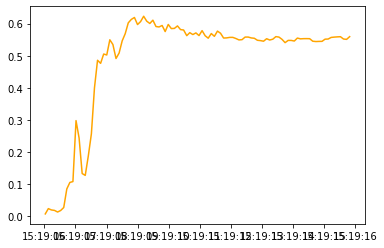

In [ ]:
df=roomba_data[['Series_ID','X_error','Y_error','Distance_travelled_error','Cumulative_Time','Velocity','Theta','timestamp']]
df['Velocity'].unique()
# df1=df[df['Velocity']==0.45]
# plt.plot(df1['timestamp'], df1['Distance_travelled_error'], color='red')
df3=df[df['Velocity']==0.45]
plt.plot(df3['timestamp'], df3['Distance_travelled_error'], color='orange')

# sns.color_palette("tab10")

# data_df=df[df['Velocity']==-0.14]
# sns.relplot(y="X_error", x="Cumulative_Time", hue="Velocity", size="Theta",
#              alpha=.85, sizes=(10, 100),palette="tab10",
#             height=6, data=data_df)
# sns.relplot(y="Y_error", x="Cumulative_Time", hue="Velocity", size="Theta",
#              alpha=.85, sizes=(10, 100),palette="tab10",
#             height=6, data=data_df)

Velocity= [ 0.44 -0.14]


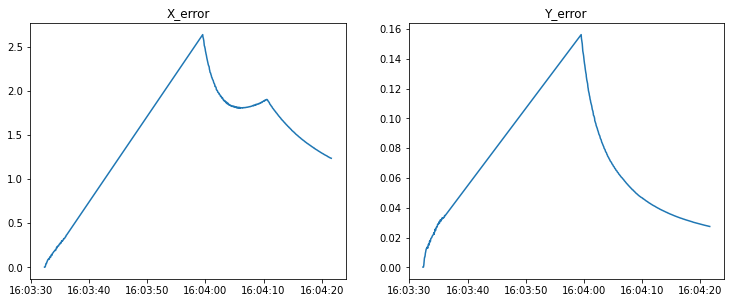

In [ ]:
s1=df[df['Series_ID']==5]

plt.figure(figsize=(26, 16))
print("Velocity=",s1['Velocity'].unique())
for i, col in enumerate(s1.columns[1:3]):
    plt.subplot(3, 4, i + 1)
    plt.plot(s1['timestamp'],s1[col])
    plt.title(col)


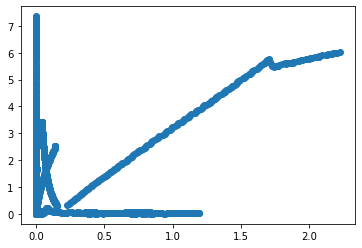

In [ ]:
df = roomba_data[["Distance_travelled_error", "Y_error"]]
plt.scatter(df["Y_error"],df["Distance_travelled_error"], )

In [ ]:
X = df.values
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [ ]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.03)
outlier_index

In [ ]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

In [ ]:
# plot data
plt.scatter(df["Y_error"],df["Distance_travelled_error"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Y_error"], outlier_values["Distance_travelled_error"], color = "r")
